House Price prediction with use of XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

In [2]:
df_train=pd.read_csv('house_train.csv')
df_train.shape

(1460, 81)

Lets create a function to check for columns with null values

a function for imputing the null values. Null values will be replaced by Most frequent value for Catagorical Values and Median for Numerical Values

In [3]:
def checkForNull(df):
    colList=df.columns
    for col in colList:
        nullCount=pd.isnull(df[col]).sum()
        if(nullCount!=0):
            print("{}-->{}".format(col,nullCount))
            
def imputeData(df):
    colList=df.columns
    for col in colList:
        if(df[col].dtypes=='O'):
            imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            df_temp=imp.fit_transform(np.array(df[col]).reshape(-1,1))
            df[col]=LabelEncoder().fit_transform(df_temp)
        else:
            imp = SimpleImputer(missing_values=np.nan, strategy='median')
            df[col]=imp.fit_transform(np.array(df[col]).reshape(-1,1))

In [4]:
checkForNull(df_train)

LotFrontage-->259
Alley-->1369
MasVnrType-->8
MasVnrArea-->8
BsmtQual-->37
BsmtCond-->37
BsmtExposure-->38
BsmtFinType1-->37
BsmtFinType2-->38
Electrical-->1
FireplaceQu-->690
GarageType-->81
GarageYrBlt-->81
GarageFinish-->81
GarageQual-->81
GarageCond-->81
PoolQC-->1453
Fence-->1179
MiscFeature-->1406


Out of total 1460 rows columns Alley,'FireplaceQu',PoolQC,Fence and MiscFeature dont have much data i.e have mostly null values. So we will remove them.

In [5]:
df_train=df_train.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=False)
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Next task is to remove the outliners.

Outliners are the data points that shows abnormality with respect to other data points.

Lets plot each column and process the data which will involve the dropping of rows.

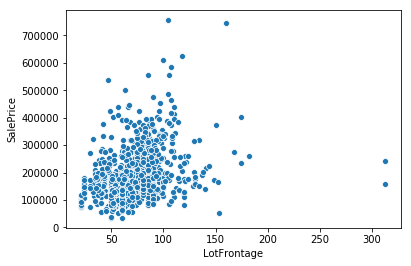

In [6]:
sea.scatterplot(df_train['LotFrontage'],df_train['SalePrice'])
plt.show()

In [7]:
df_train=df_train.drop(df_train.loc[df_train['LotFrontage']>250].index,axis=0)
df_train=df_train.drop(df_train.loc[df_train['LotArea']>100000].index,axis=0)
df_train=df_train.drop(df_train.loc[(df_train['OverallCond']==2) & (df_train['SalePrice']>300000)].index,axis=0)
df_train=df_train.drop(df_train.loc[df_train['LowQualFinSF']>550].index,axis=0)
df_train=df_train.drop(df_train.loc[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index,axis=0)
df_train=df_train.drop(df_train.loc[(df_train['OpenPorchSF']>500) & (df_train['SalePrice']<100000)].index,axis=0)
df_train=df_train.drop(df_train.loc[df_train['EnclosedPorch']>500].index,axis=0)
df_train=df_train.drop(df_train.loc[df_train['MiscVal']>3000].index,axis=0)
df_train.shape

(1446, 75)

Again check for null values for remaining column

In [8]:
checkForNull(df_train)

LotFrontage-->254
MasVnrType-->8
MasVnrArea-->8
BsmtQual-->36
BsmtCond-->36
BsmtExposure-->37
BsmtFinType1-->36
BsmtFinType2-->37
Electrical-->1
GarageType-->79
GarageYrBlt-->79
GarageFinish-->79
GarageQual-->79
GarageCond-->79


Impute the missing data

In [9]:
imputeData(df_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Verify for no null values

In [10]:
checkForNull(df_train)

Transform the target values

In [11]:
X=df_train.drop('SalePrice',axis=1)
scaler=MinMaxScaler().fit(np.array(df_train['SalePrice']).reshape(-1,1))
Y=scaler.transform(np.array(df_train['SalePrice']).reshape(-1,1))
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

We will do feature selection using SelectKBest.

We will use the feature for prediction according to its importance.

In [12]:
from sklearn.feature_selection import SelectKBest,chi2
best=SelectKBest(chi2,k=70).fit(X,df_train['SalePrice'])
best_X=best.transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(best_X,Y,test_size=0.1,random_state=101)

We can see the selected features and sort them with their score.

-1 for sort in decreasing order.

In [13]:
indices = np.argsort(best.scores_)[::-1]
for i in indices:
    print("{}--->{}".format(df_train.columns[i],best.scores_[i]))

LotArea--->2145726.729745811
MiscVal--->892827.0985091677
PoolArea--->479288.16439158714
2ndFlrSF--->460955.2950660812
BsmtFinSF1--->386535.77169257216
BsmtFinSF2--->358306.36947590864
MasVnrArea--->283859.4151974
BsmtUnfSF--->272469.95324831543
LowQualFinSF--->208680.8977907689
GrLivArea--->185559.2386126545
TotalBsmtSF--->167617.53820618082
3SsnPorch--->153402.60096677492
ScreenPorch--->128358.72526179363
WoodDeckSF--->125476.43984231395
1stFlrSF--->117076.58196081112
EnclosedPorch--->99409.39087884032
GarageArea--->94262.81840290058
OpenPorchSF--->66495.33028825879
MSSubClass--->18827.333930423516
LotFrontage--->4313.43899965474
RoofMatl--->2807.4643564356356
Neighborhood--->2173.3295771341877
BldgType--->1942.1437926844776
HeatingQC--->1466.4306191451071
GarageType--->1018.2104431516243
HouseStyle--->813.0337123433632
Exterior2nd--->803.8740765159787
LotShape--->791.7395919080641
BsmtFinType1--->781.3270448601106
LandSlope--->751.2010629136479
MoSold--->736.2304676745453
Exterior1s

Here comes the XGBoost with its tuned parameters ( using GridSearchCV )

In [14]:
boost=XGBRegressor(n_estimators=150,learning_rate=0.09,max_depth=10,booster='gbtree',verbosity=0,n_jobs=-1,random_state=47)
boost.fit(X_train,Y_train)
np.sqrt(mean_squared_error(Y_train,boost.predict(X_train)))

0.001211370180388285

In [15]:
np.sqrt(mean_squared_error(Y_test,boost.predict(X_test)))

0.030674008695978222

Similar changes for test data

In [16]:
df_test=pd.read_csv('house_test.csv')
checkForNull(df_test)

MSZoning-->4
LotFrontage-->227
Alley-->1352
Utilities-->2
Exterior1st-->1
Exterior2nd-->1
MasVnrType-->16
MasVnrArea-->15
BsmtQual-->44
BsmtCond-->45
BsmtExposure-->44
BsmtFinType1-->42
BsmtFinSF1-->1
BsmtFinType2-->42
BsmtFinSF2-->1
BsmtUnfSF-->1
TotalBsmtSF-->1
BsmtFullBath-->2
BsmtHalfBath-->2
KitchenQual-->1
Functional-->2
FireplaceQu-->730
GarageType-->76
GarageYrBlt-->78
GarageFinish-->78
GarageCars-->1
GarageArea-->1
GarageQual-->78
GarageCond-->78
PoolQC-->1456
Fence-->1169
MiscFeature-->1408
SaleType-->1


In [17]:
df_test=df_test.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=False)
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [18]:
imputeData(df_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [19]:
checkForNull(df_test)

After prediction we will inverse the transformation to get actual values.

In [20]:
output=boost.predict(best.transform(df_test))
out_transformed=scaler.inverse_transform(output.reshape(-1,1)).reshape(-1,)
out_transformed

array([121076.43, 158133.62, 179003.17, ..., 185339.86, 111432.65,
       224071.58], dtype=float32)